In [2]:
import cv2  
import numpy as np  
  
# Load Yolo  
print("LOADING YOLO")  
net = cv2.dnn.readNet("C:\\Users\\obvious\\Desktop\\sight\\yolov3.weights", "C:\\Users\\obvious\\Desktop\\sight\\yolov3.cfg")  
# Save all the names in file o the list classes  
classes = []  
with open("C:\\Users\\obvious\\Desktop\\sight\\coco.names", "r") as f:  
    classes = [line.strip() for line in f.readlines()]  
# Get layers of the network  
layer_names = net.getLayerNames()  
# Determine the output layer names from the YOLO model  
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]  
print("YOLO LOADED")

LOADING YOLO
YOLO LOADED


In [9]:
 # Capture frame-by-frame
img = cv2.imread("C:\\Users\\obvious\\Desktop\\online_pytorch_class\\hymenoptera_data\\hymenoptera_data\\train\\ants\\0013035.jpg")
#     img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
 
    # USing blob function of opencv to preprocess image
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
     swapRB=True, crop=False)
    #Detecting objects
net.setInput(blob)
outs = net.forward(output_layers)
 
    # Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
 
                # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
 
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)           
    
    #We use NMS function in opencv to perform Non-maximum Suppression
    #we give it score threshold and nms threshold as arguments.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX,
			1/2, color, 2)
import cv2  
import tkinter as tk  
from PIL import Image, ImageTk  
  

  
# 将OpenCV图像转换为Tkinter可用的格式  
cv_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
tk_img = Image.fromarray(cv_img)  
  
# 创建Tkinter窗口  
window = tk.Tk()  
window.title("Image Display using Tkinter")  
window.geometry("500x500")  
  
# 创建Tkinter画布  
canvas = tk.Canvas(window, width=tk_img.width, height=tk_img.height)  
canvas.pack()  
  
# 将Tkinter图像添加到画布上  
photo = ImageTk.PhotoImage(tk_img)  
canvas.create_image(0, 0, anchor='nw', image=photo)  
  
# 显示窗口  
window.mainloop()
cv2.imshow("Image",img)
cv2.waitKey(0)

TclError: image "pyimage1" doesn't exist

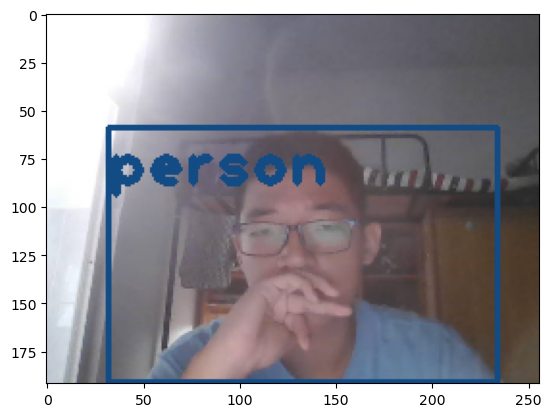

error: OpenCV(4.6.0) C:\b\abs_f8n1j3l9l0\croot\opencv-suite_1691622637237\work\modules\highgui\src\window.cpp:1333: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [13]:
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    re,img = video_capture.read()
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape
 
    # USing blob function of opencv to preprocess image
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
     swapRB=True, crop=False)
    #Detecting objects
    net.setInput(blob)
    outs = net.forward(output_layers)
 
    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
 
                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
 
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    
    #We use NMS function in opencv to perform Non-maximum Suppression
    #we give it score threshold and nms threshold as arguments.
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(len(classes), 3))
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 2, color, 3)
 
    import matplotlib.pyplot as plt  
  
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
    plt.show()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

In [ ]:
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    re,img = video_capture.read()
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape
 
    # USing blob function of opencv to preprocess image
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
     swapRB=True, crop=False)
    #Detecting objects
    net.setInput(blob)
    outs = net.forward(output_layers)
 
    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
 
                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
 
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    
    #We use NMS function in opencv to perform Non-maximum Suppression
    #we give it score threshold and nms threshold as arguments.
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(len(classes), 3))
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 2, color, 3)
 
    cv2.imshow("Image",cv2.resize(img, (800,600)))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()